### Importing libraries

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True,formatter={'float_kind': '{:f}'.format})

### Filtering data of India, China, and Bangladesh

In [66]:
!python filterdata.py

### Data exploration and preprocessing

In [67]:
data=pd.read_csv('input.csv')

In [68]:
data.shape

(2514, 67)

In [69]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

1) Dropping continent and location as they give no information

In [70]:
data=data.drop(['continent','location'],axis=1)

2) Dropping the columns with all NaN values

In [73]:
p=data.isna().all()
null_cols=p[p==True].index.to_list()
null_cols

['icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million']

In [74]:
data=data.drop(null_cols,axis=1)

In [100]:
# data_bgd = data[data['iso_code'].isin(['BGD'])]

3) Dropping the columns with all same values for each country

In [101]:
def func(x):
    if(x.dtype=='float64'):
        return (x-x.shift()).sum()
    return 1000000

In [102]:
p=data.groupby(['iso_code']).agg(func)
p

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
BGD,1000000,1953353.0,25.0,30.714,29129.0,-1.0,0.0,11745.712,0.15,0.184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
x=p.sum()
same_valued_cols=x[x==0].index.to_list()
same_valued_cols

['new_deaths_smoothed',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [104]:
len(same_valued_cols)

16

In [105]:
# data[data['iso_code']=='IND'][same_valued_cols].nunique()

new_deaths_smoothed           759
population                      1
population_density              1
median_age                      1
aged_65_older                   1
aged_70_older                   1
gdp_per_capita                  1
extreme_poverty                 1
cardiovasc_death_rate           1
diabetes_prevalence             1
female_smokers                  1
male_smokers                    1
handwashing_facilities          1
hospital_beds_per_thousand      1
life_expectancy                 1
human_development_index         1
dtype: int64

In [78]:
data[same_valued_cols].nunique()

population                    3
population_density            3
median_age                    3
aged_65_older                 3
aged_70_older                 3
gdp_per_capita                3
extreme_poverty               3
cardiovasc_death_rate         3
diabetes_prevalence           3
female_smokers                2
male_smokers                  3
handwashing_facilities        2
hospital_beds_per_thousand    3
life_expectancy               3
human_development_index       3
dtype: int64

In [12]:
data=data.drop(same_valued_cols,axis=1)

4) Dropping the columns with high correlation with other columns

In [13]:
similar_cols=[[col[:(col.find('_per_million'))^(col.find('_per_thousand'))^(col.find('_per_hundred'))],col] for col in data if((col.find('_per_million')!=-1)|(col.find('_per_thousand')!=-1)|(col.find('_per_hundred')!=-1))]
similar_cols

[['total_cases', 'total_cases_per_million'],
 ['new_cases', 'new_cases_per_million'],
 ['new_cases_smoothed', 'new_cases_smoothed_per_million'],
 ['total_deaths', 'total_deaths_per_million'],
 ['new_deaths', 'new_deaths_per_million'],
 ['new_deaths_smoothed', 'new_deaths_smoothed_per_million'],
 ['total_tests', 'total_tests_per_thousand'],
 ['new_tests', 'new_tests_per_thousand'],
 ['new_tests_smoothed', 'new_tests_smoothed_per_thousand'],
 ['total_vaccinations', 'total_vaccinations_per_hundred'],
 ['people_vaccinated', 'people_vaccinated_per_hundred'],
 ['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'],
 ['total_boosters', 'total_boosters_per_hundred'],
 ['new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million'],
 ['new_people_vaccinated_smoothed',
  'new_people_vaccinated_smoothed_per_hundred']]

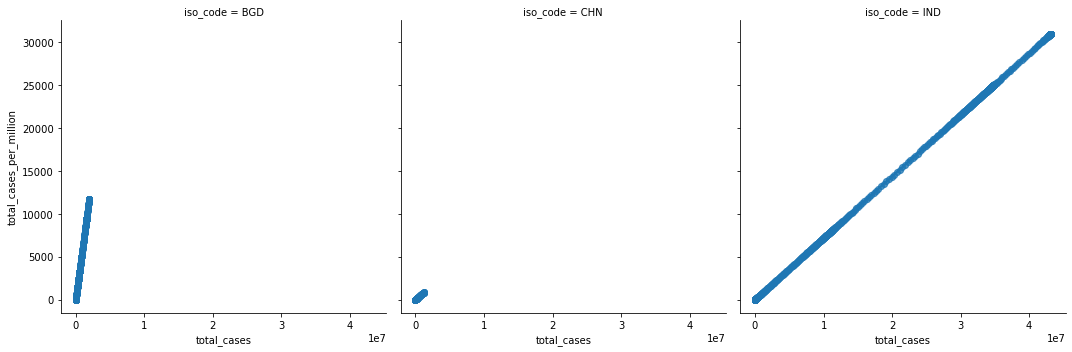

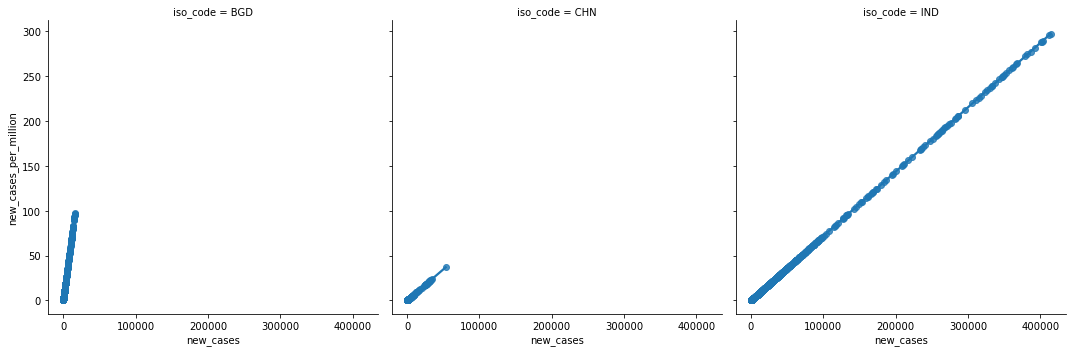

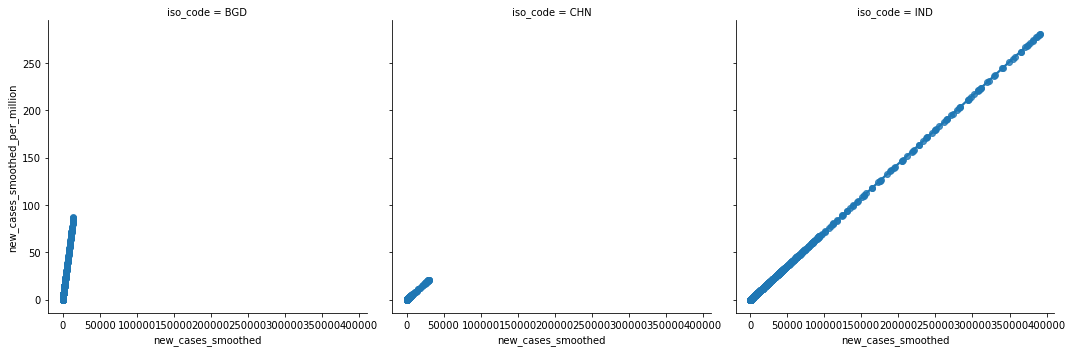

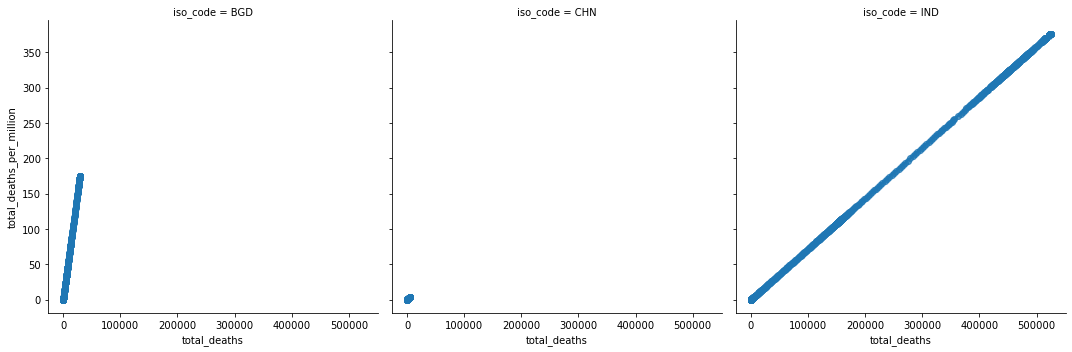

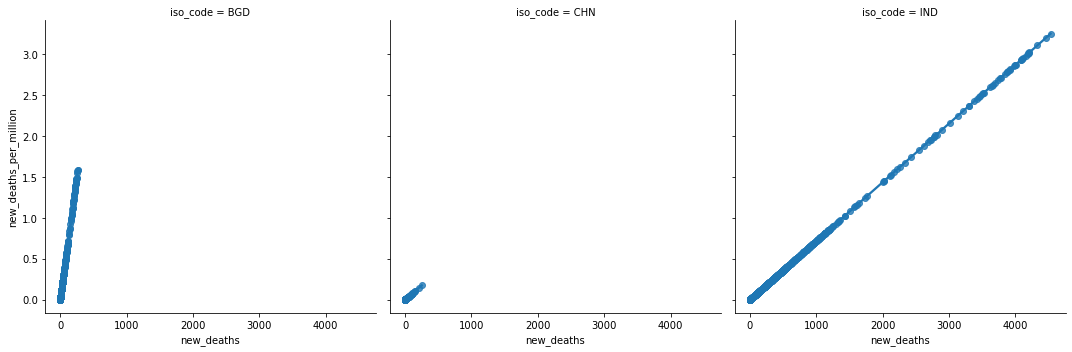

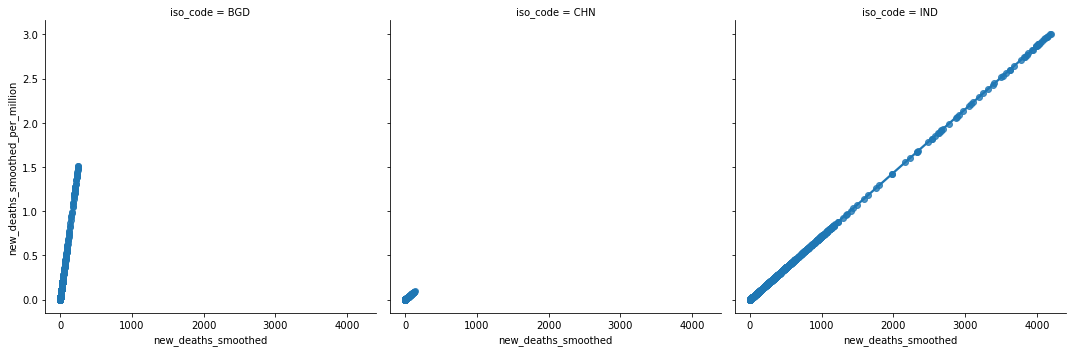

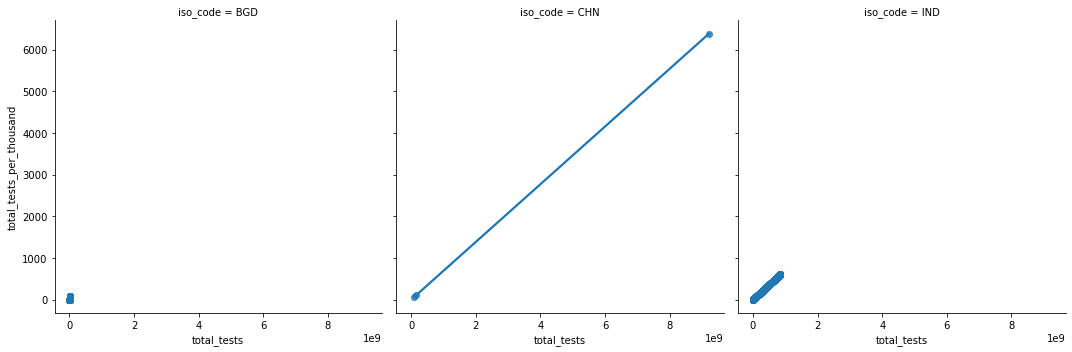

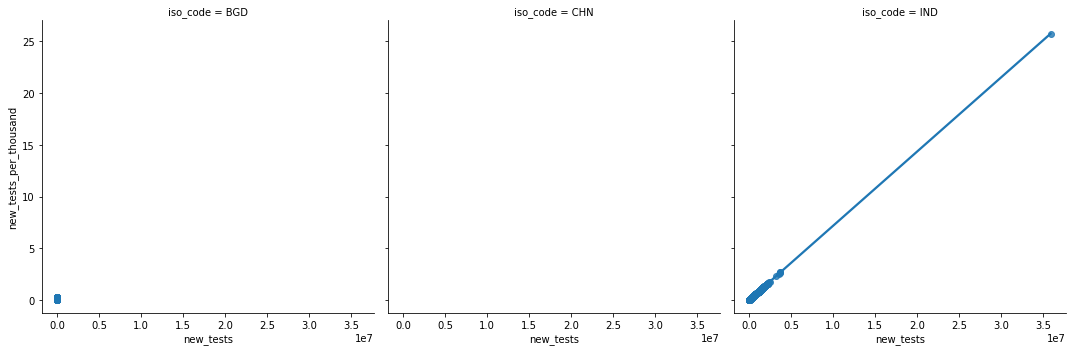

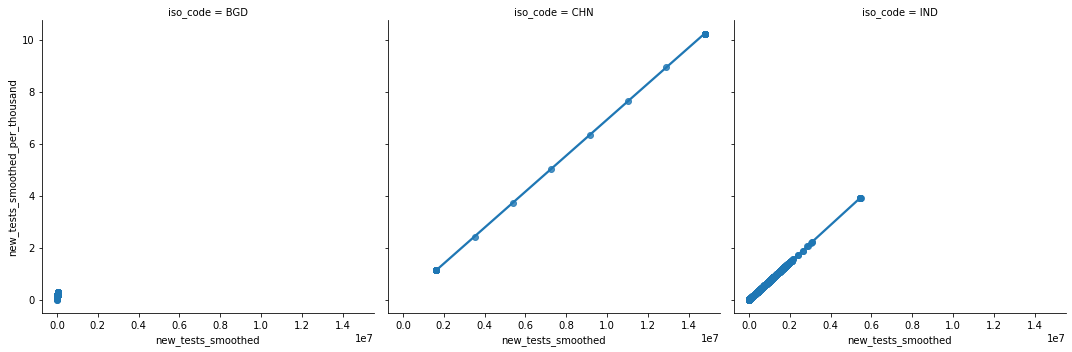

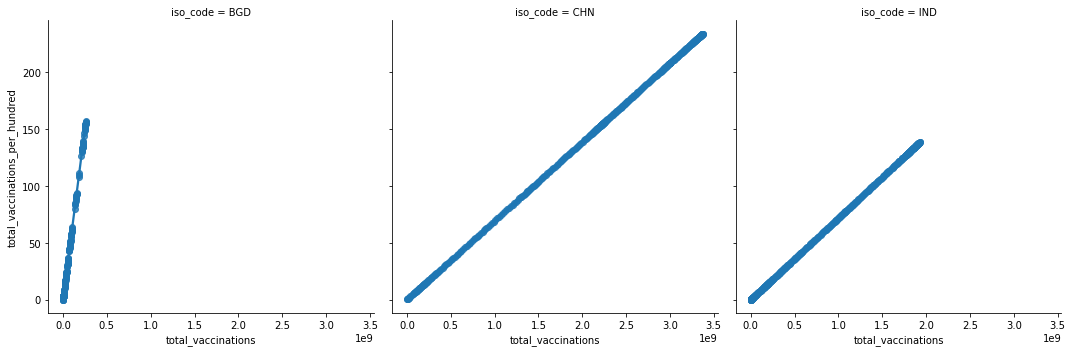

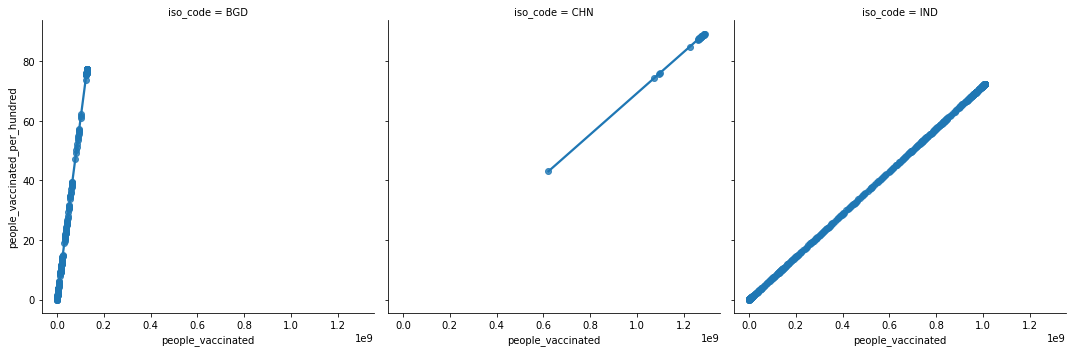

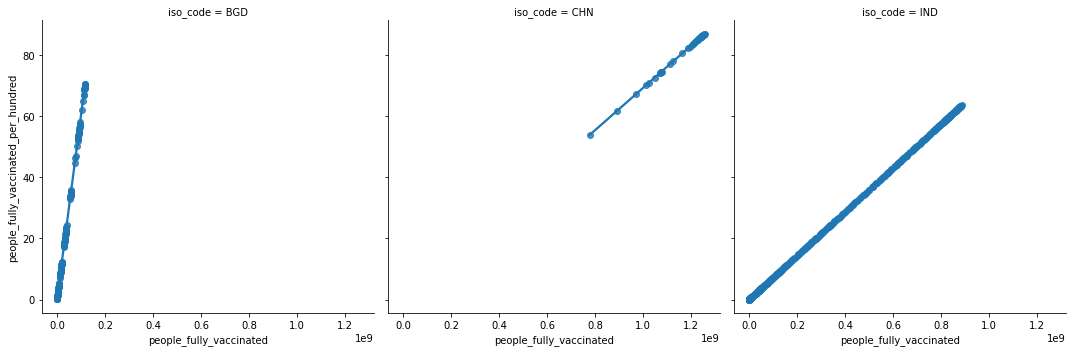

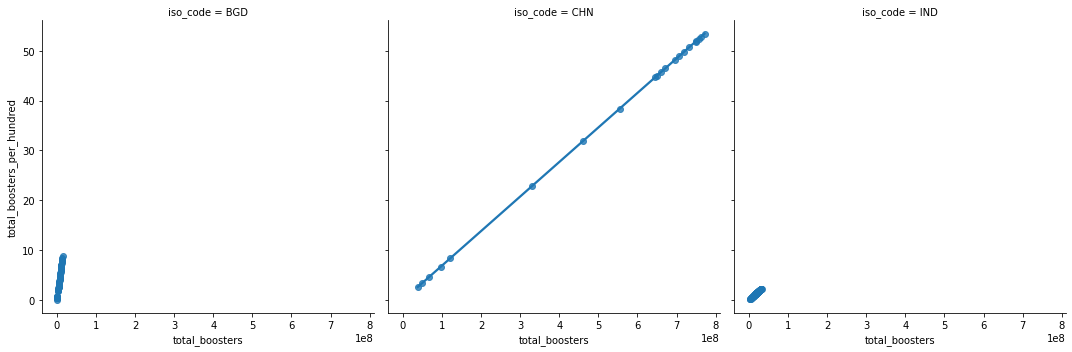

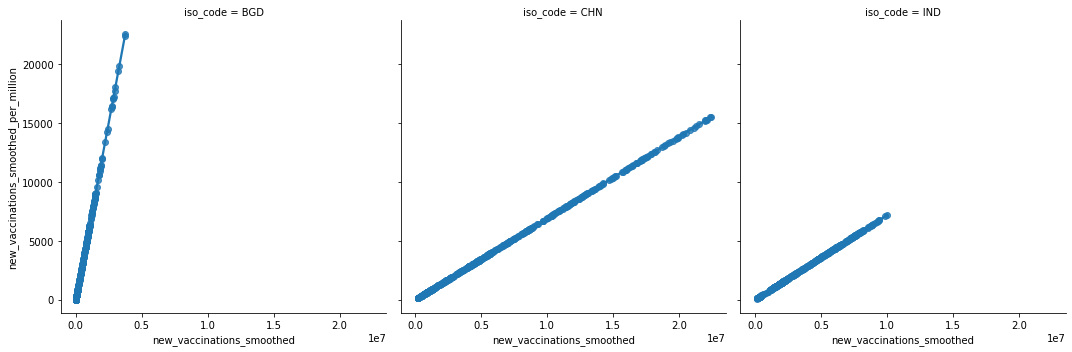

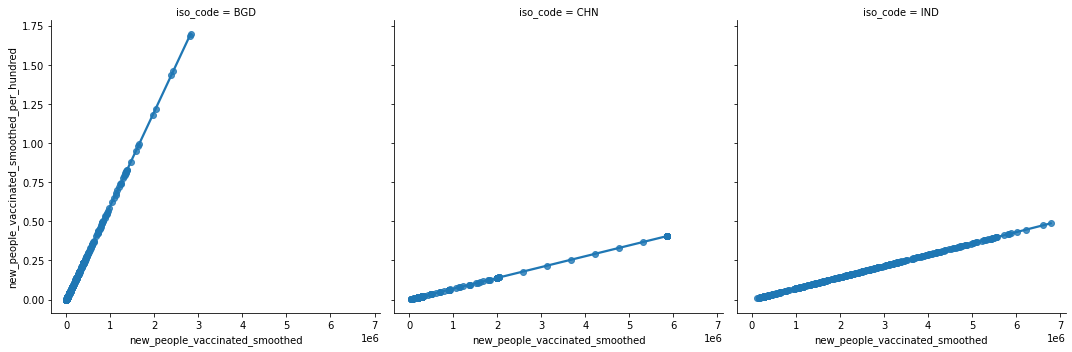

In [14]:
for x,y in similar_cols:
    sns.lmplot(x=x,y=y,data=data,col='iso_code')

In [15]:
data.drop([i[1] for i in similar_cols],axis=1,inplace=True)

5) Checking if a column and its smoothed values are correlated

In [16]:
smoothed_cols=[[col[:(col.find('_smoothed'))],col] for col in data if((col.find('_smoothed')!=-1)&(col[:(col.find('_smoothed'))] in data))]
smoothed_cols

[['new_cases', 'new_cases_smoothed'],
 ['new_deaths', 'new_deaths_smoothed'],
 ['new_tests', 'new_tests_smoothed'],
 ['new_vaccinations', 'new_vaccinations_smoothed']]

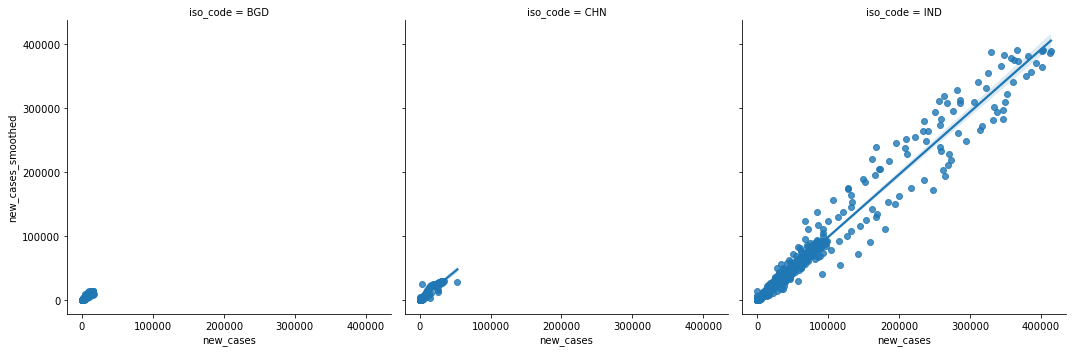

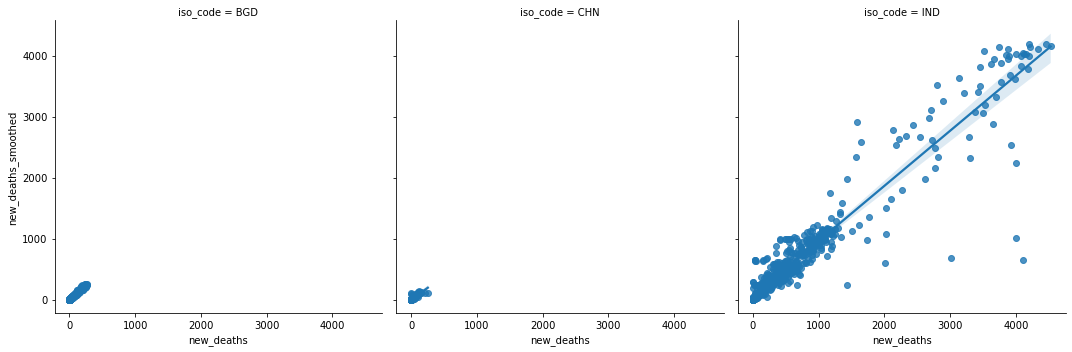

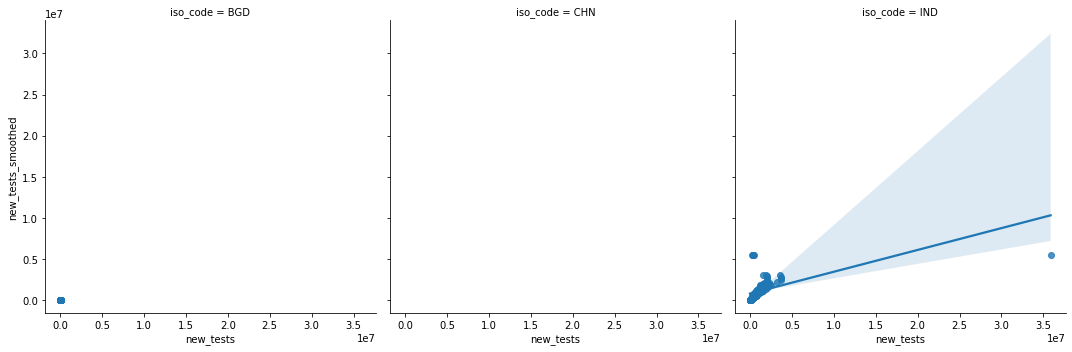

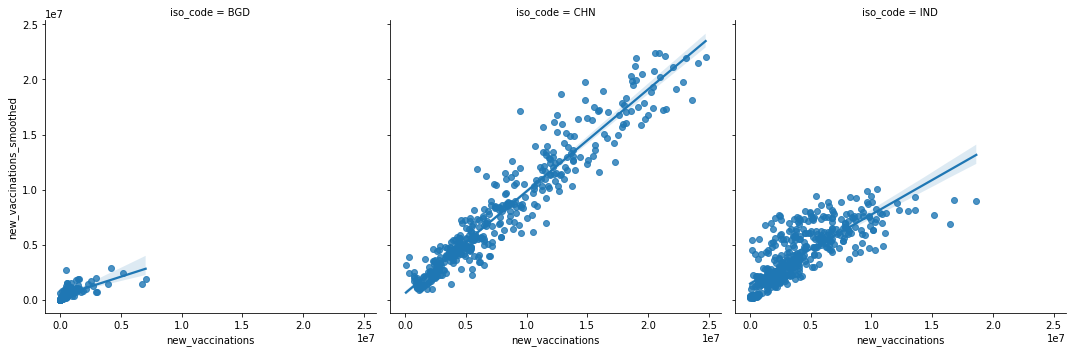

In [17]:
for x,y in smoothed_cols:
    sns.lmplot(x=x,y=y,data=data,col='iso_code')

6) *Total* columns are cumulative sum of their corresponding *new* columns (e.g. total_cases and new_cases). Filling *new* columns using *total* columns and dropping *total* columns.

In [18]:
total_and_new=list({col[6:] for col in data if(col.find('total_')!=-1)}.intersection({col[4:] for col in data if(col.find('new_')!=-1)}))
total_and_new

['deaths', 'vaccinations', 'tests', 'cases']

In [19]:
p=data.groupby(['iso_code'])

In [20]:
for i in total_and_new:
    print(((data['total_'+i]-p['total_'+i].shift(1))==data['new_'+i]).sum(),((data['total_'+i]-p['total_'+i].shift(1))==data['new_'+i]).sum()+data['new_'+i].isna().sum(),data['new_'+i].isna().sum(),data['total_'+i].isna().sum())

2455 2512 57 51
1061 2514 1453 1329
1478 2493 1015 997
2509 2512 3 0


In [21]:
for i in total_and_new:
    data['new_'+i].fillna(data['total_'+i]-p['total_'+i].shift(1),inplace=True)

In [22]:
data.drop(['total_'+col for col in total_and_new],axis=1,inplace=True)

7) Dropping columns with many missing values

In [23]:
p=data.isna().sum()
p

iso_code                             0
date                                 0
new_cases                            1
new_cases_smoothed                  23
new_deaths                          52
new_deaths_smoothed                 72
reproduction_rate                   97
new_tests                         1015
new_tests_smoothed                 290
positive_rate                      299
tests_per_case                     299
tests_units                        269
people_vaccinated                 1744
people_fully_vaccinated           1798
total_boosters                    2312
new_vaccinations                  1453
new_vaccinations_smoothed         1009
new_people_vaccinated_smoothed    1189
stringency_index                    44
dtype: int64

In [24]:
majority_null_cols=p[p>1100].index.to_list()+['new_vaccinations_smoothed']
majority_null_cols

['people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_people_vaccinated_smoothed',
 'new_vaccinations_smoothed']

In [25]:
data=data.drop(majority_null_cols,axis=1)

8) Checking number of missing values in each column by country

In [26]:
p=data.isna().sum()
(pd.concat([data['iso_code'],data[p[p>200].index.to_list()].isna()],axis=1)).groupby(['iso_code']).sum()

,new_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units
iso_code,,,,,
BGD,79,33,34,34,26
CHN,856,206,206,206,199
IND,80,51,59,59,44


9) Correlation matrix

<AxesSubplot:>

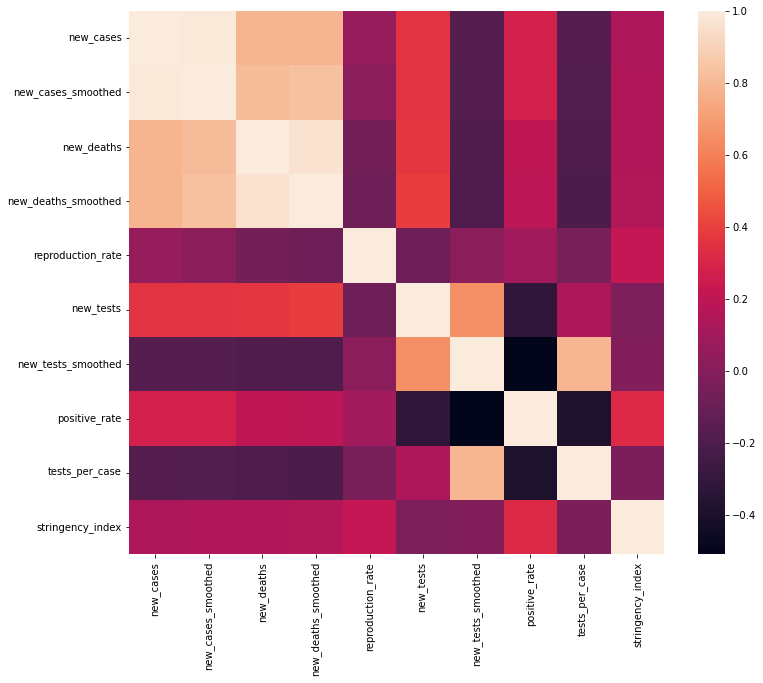

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())

10) Dropping *new_cases_smoothed* column as it is highly correlated with *new_cases* column

In [28]:
data.drop(['new_cases_smoothed'],inplace=True,axis=1)

11) Extracting date, month and year from *date* column

In [29]:
data.date=pd.to_datetime(data.date)

In [30]:
final_data=data.drop(['date'],axis=1)
final_data['day']=data.date.dt.day
final_data['month']=data.date.dt.month
final_data['year']=data.date.dt.year

12) Removing rows with no target variable (*new_cases*)

In [31]:
final_data=final_data[final_data['new_cases'].isna()==False]

13) One-hot encoding string columns

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
objects=['iso_code','tests_units']
encodings=[]
for col in objects:
    encoding=OneHotEncoder(sparse=False).fit_transform(data[col].to_numpy().reshape(-1, 1))
    colnames=final_data[col].unique()
    encodings.append(pd.DataFrame(encoding,columns=colnames))
final_data=final_data.drop(objects,axis=1)
encodings=pd.concat(encodings,axis=1)
final_data=pd.concat([final_data,encodings],axis=1)

In [34]:
final_data

,new_cases,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,stringency_index,day,month,year,BGD,CHN,IND,NaN,tests performed,samples tested
0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,8.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,9.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,10.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,11.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,12.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,1675.0,31.0,32.857,NaN,294812.0,422581.0,0.005,201.3,NaN,23.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2511,2124.0,17.0,30.571,NaN,407626.0,429745.0,0.005,200.6,NaN,24.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2512,2628.0,18.0,31.714,NaN,458924.0,433168.0,0.005,198.7,NaN,25.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2513,2710.0,14.0,30.857,NaN,NaN,NaN,NaN,NaN,NaN,26.0,5.0,2022.0,0.0,0.0,1.0,0.0,0.0,1.0


### Model training

In [35]:
!pip install xgboost

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# XGBoost model

In [37]:
cols=final_data.columns
final_data=IterativeImputer().fit_transform(final_data)
final_data=pd.DataFrame(final_data,columns=cols)

In [38]:
y=final_data['new_cases']
X=final_data.drop(['new_cases'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
params_xgb={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100,500,1000,1500,2000]
        }

In [41]:
xgb=RandomizedSearchCV(XGBRegressor(),params_xgb,random_state=0,n_jobs=-1)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9920944418045745

In [42]:
xgb.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_child_weight': 10,
 'gamma': 1,
 'colsample_bytree': 0.8}

# Linear regression model

In [43]:
cols=data.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6550712425365962

# Ridge regression model

In [45]:
params_ridge={
        'alpha': [0.1,1,10,100,1000]
        }

In [46]:
ridge=RandomizedSearchCV(Ridge(),params_ridge,random_state=0)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.6488812325243634

In [47]:
ridge.best_params_

{'alpha': 100}

4) ARIMA model to predict features 

In [48]:
!pip install pmdarima

In [49]:
import pmdarima as pm

In [50]:
import os
import joblib

In [51]:
BGD=final_data[final_data['BGD']==1]
CHN=final_data[final_data['CHN']==1]
IND=final_data[final_data['IND']==1]

In [52]:
cols=['new_deaths','new_deaths_smoothed','reproduction_rate','new_tests','new_tests_smoothed','positive_rate','tests_per_case','stringency_index','tests performed','samples tested']
folder='models/'
models={}
if (os.path.exists(folder)==False):
  for col in cols:
    d_BGD=BGD[col]
    d_CHN=CHN[col]
    d_IND=IND[col]
    BGD_model=pm.auto_arima(y=d_BGD,m=1)
    CHN_model=pm.auto_arima(y=d_CHN,m=1)
    IND_model=pm.auto_arima(y=d_IND,m=1)
    models[col]={'BGD':BGD_model,'CHN':CHN_model,'IND':IND_model}
  os.mkdir(folder)
  for col,models_ in models.items():
    file_name_pfx=col+'_'
    for country,model in models_.items():
      file_name=file_name_pfx+country+'.pkl'
      file_path=folder+file_name
      joblib.dump(model, file_path)
else:
  for file_name in os.listdir(folder):
    p=file_name[:-4]
    country=p[-3:]
    feature=p[:-4]
    if feature in models:
      models[feature][country]=joblib.load(folder+file_name)
    else:
      models[feature]={country:joblib.load(folder+file_name)}

### Generating features from ARIMA model

In [53]:
start=pd.to_datetime('26-05-2022')
end=pd.to_datetime('26-08-2022')

In [54]:
feats_to_gen=(end-start).days+1

In [55]:
dates=pd.date_range(start,end).to_series()

In [56]:
features=[]
for col in cols:
  d_BGD=pd.Series(models[col]['BGD'].predict(feats_to_gen),name=col)
  d_CHN=pd.Series(models[col]['CHN'].predict(feats_to_gen),name=col)
  d_IND=pd.Series(models[col]['IND'].predict(feats_to_gen),name=col)
  d=[d_BGD,d_CHN,d_IND]
  features.append(d)
features.append([dates.dt.day.rename('day'),dates.dt.day.rename('day'),dates.dt.day.rename('day')])
features.append([dates.dt.month.rename('month'),dates.dt.month.rename('month'),dates.dt.month.rename('month')])
features.append([dates.dt.year.rename('year'),dates.dt.year.rename('year'),dates.dt.year.rename('year')])
features.append([pd.Series([1 for i in range(feats_to_gen)],name='BGD'),pd.Series([0 for i in range(feats_to_gen)],name='BGD'),pd.Series([0 for i in range(feats_to_gen)],name='BGD')])
features.append([pd.Series([0 for i in range(feats_to_gen)],name='CHN'),pd.Series([1 for i in range(feats_to_gen)],name='CHN'),pd.Series([0 for i in range(feats_to_gen)],name='CHN')])
features.append([pd.Series([0 for i in range(feats_to_gen)],name='IND'),pd.Series([0 for i in range(feats_to_gen)],name='IND'),pd.Series([1 for i in range(feats_to_gen)],name='IND')])

In [57]:
for i in range(len(features)):
  features[i]=pd.concat(features[i],axis=0).reset_index().drop('index',axis=1)

In [58]:
features=pd.concat(features,axis=1)
features['NaN']=0

In [59]:
c=['tests performed','samples tested']
to_move=features[c]
features.drop(c,axis=1,inplace=True)
features=pd.concat([features,to_move],axis=1)

In [60]:
features

,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,stringency_index,day,month,year,BGD,CHN,IND,NaN,tests performed,samples tested
0,0.323770,0.458454,0.874024,3711.295341,1.193000e+03,0.098320,-3.508556,55.040688,26,5,2022,1,0,0,0,1.0,0.000000
1,0.264105,0.536485,0.878307,3454.308921,1.193000e+03,0.112382,-3.508556,55.040688,27,5,2022,1,0,0,0,1.0,0.000000
2,0.273544,0.552465,0.880076,3988.392288,1.193000e+03,0.125415,-3.508556,55.040688,28,5,2022,1,0,0,0,1.0,0.000000
3,0.423088,0.547821,0.881069,4251.149735,1.193000e+03,0.137492,-3.508556,55.040688,29,5,2022,1,0,0,0,1.0,0.000000
4,0.398239,0.566050,0.881542,4370.354183,1.193000e+03,0.148685,-3.508556,55.040688,30,5,2022,1,0,0,0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,11.127782,46.050473,-0.758579,684534.210779,1.558862e+06,-0.582369,10892.147994,-96.266290,22,8,2022,0,0,1,0,0.0,2.478386
275,11.124626,46.050997,-0.758579,684534.210779,1.549648e+06,-0.583335,10892.147994,-96.908488,23,8,2022,0,0,1,0,0.0,2.495123
276,11.121651,46.051477,-0.758579,684534.210779,1.540655e+06,-0.584287,10892.147994,-98.160448,24,8,2022,0,0,1,0,0.0,2.511861
277,11.118847,46.051918,-0.758579,684534.210779,1.531874e+06,-0.585226,10892.147994,-98.638932,25,8,2022,0,0,1,0,0.0,2.528598


### Results

In [61]:
result_xgb=xgb.predict(features)
result_lr=lr.predict(features)
result_ridge=ridge.predict(features)

In [62]:
result_xgb

array([-447.489319, 543.346069, 319.915497, 247.319016, 948.330627,
       1084.976318, 663.645691, 801.032898, 705.243103, 812.692993,
       820.050171, 1174.694946, 952.340881, 1045.290405, 953.358521,
       893.006104, 1078.688843, 914.943176, 997.520752, 3450.485352,
       3915.527100, 2989.195557, 3239.439697, 3752.093506, 3783.267090,
       3960.140381, 4018.547363, 3676.568359, 3533.706543, 3520.170654,
       3674.936523, 4487.588379, 4707.086914, 4873.906738, 4727.496582,
       4217.870117, 3705.555908, 3855.563232, 4208.092773, 4364.413574,
       4422.253906, 4553.000000, 4017.487305, 3878.806641, 4077.431152,
       4005.068359, 4107.147461, 4255.729980, 4234.211914, 4269.497070,
       4366.002441, 3748.434326, 3998.679932, 4647.317383, 4789.476074,
       4831.465820, 4570.957031, 4137.690430, 4195.141113, 4195.141113,
       4485.895020, 5382.444824, 5380.996582, 5109.528320, 4949.582520,
       4688.295898, 4501.351562, 4287.734863, 4510.941406, 4478.840332,
      

In [63]:
result_lr

array([424267250.261503, 378414381.065601, 473711643.336310,
       520598664.897535, 541868794.645405, 612633574.868315,
       581716308.684745, 428116175.103569, 382856377.455306,
       473630124.414355, 519876147.601604, 542186852.972301,
       608538024.258130, 578365594.248769, 431407275.065192,
       387484246.667922, 473334570.301061, 519476492.547333,
       542177071.123574, 604862514.613797, 574972333.868880,
       434726686.484716, 391759485.911887, 473282987.793178,
       518944786.822651, 542225061.862111, 601219535.962544,
       571852163.087325, 437785423.267478, 395956159.637837,
       473222790.889305, 518500896.000925, 542135814.857531,
       597783042.682532, 568831249.454049, 440741904.845357,
       399927560.585736, 473253008.131376, 518015596.412209,
       541999581.910182, 594436915.381279, 565967690.629185,
       443511309.581125, 403784668.610748, 473340956.229940,
       517580906.680333, 541806548.520427, 591256818.441043,
       563247300.142004,

In [64]:
result_ridge

array([10571058.127450, 10719265.002478, 10414305.144616, 10267076.823523,
       10199274.904130, 9970755.307485, 10054821.862128, 10549449.795420,
       10692957.984736, 10402032.986717, 10255607.076411, 10183086.845183,
       9969546.630731, 10068611.680395, 10541058.365733, 10681340.729531,
       10407230.203203, 10260439.774852, 10186829.517669, 9986251.178210,
       10084185.451704, 10534575.211676, 10672569.357144, 10412479.123950,
       10266446.469478, 10191264.195953, 10002980.976035, 10098526.279170,
       10528848.274443, 10663748.784115, 10417001.940745, 10271669.541851,
       10195771.143886, 10018321.652419, 10111951.333948, 10523215.014602,
       10638193.478377, 10403686.640389, 10259853.324819, 10183262.410376,
       10015981.658250, 10107711.735929, 10501185.901865, 10629816.726361,
       10407041.657224, 10264968.066589, 10187883.563437, 10029941.595152,
       10120062.725704, 10496538.651611, 10621786.599558, 10410138.228292,
       10270132.223263, 1019